In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd

btc = pd.read_csv('coin_Bitcoin.csv')
eth = pd.read_csv('coin_Ethereum.csv')
btc

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [65]:
eth

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


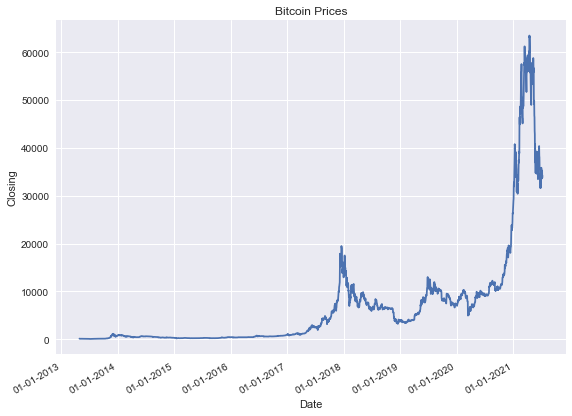

In [66]:
# task 1
plt.style.use('seaborn')

btc['Date'] = pd.to_datetime(btc['Date'])

price_date = btc['Date']
price_close = btc['Close']
plt.plot_date(price_date, price_close, marker='',linestyle='-')

plt.gcf().autofmt_xdate() # auto format
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing')
plt.show()

In [67]:
# task 2 run regression of market cap on closing price
reg = smf.ols('Close ~ Marketcap', data = btc)
print(reg.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.142e+06
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:39:07   Log-Likelihood:                -21014.
No. Observations:                2991   AIC:                         4.203e+04
Df Residuals:                    2989   BIC:                         4.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    239.0552      5.740     41.648      0.0

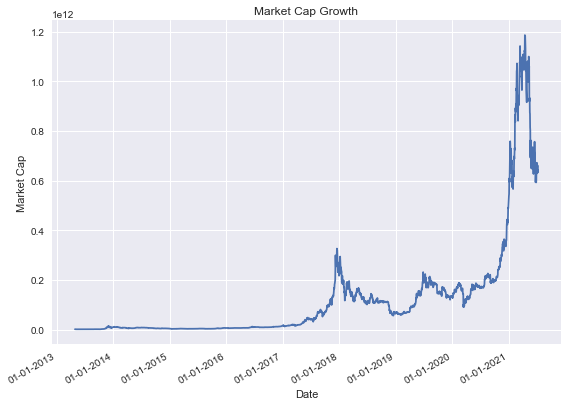

In [68]:
plt.style.use('seaborn')

btc['Date'] = pd.to_datetime(btc['Date'])

price_date = btc['Date']
price_cap = btc['Marketcap']
plt.plot_date(price_date, price_cap, marker='',linestyle='-')

plt.gcf().autofmt_xdate() # auto format
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Market Cap Growth')
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.show()

In [83]:
# bitcoin vs ethereum market cap
capeth = eth['Marketcap']
capbtc = btc['Marketcap']
btc['EthMktCap'] = capeth
reg = smf.ols('Marketcap ~EthMktCap', btc)
print(reg.fit().summary())


                            OLS Regression Results                            
Dep. Variable:              Marketcap   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     109.7
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           4.56e-25
Time:                        20:44:59   Log-Likelihood:                -56517.
No. Observations:                2160   AIC:                         1.130e+05
Df Residuals:                    2158   BIC:                         1.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.182e+10    1.4e+09     22.647      0.0